In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from scipy import stats

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score # Performance measure – Accuracy

from sklearn import preprocessing

In [9]:
df  = pd.read_csv('/content/train_loan (1).csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
personal_loan = df['LoanAmount']
df.drop(['LoanAmount'], axis=1, inplace = True)
df['LoanAmount'] = personal_loan
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount
0,LP001002,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N,128.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y,66.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y,120.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y,141.0


In [11]:
rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 614
Total Number of columns : 13


In [12]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
LoanAmount           float64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
 12  LoanAmount         592 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount           22
dtype: int64

In [15]:
df.isnull().values.any()

True

<Axes: >

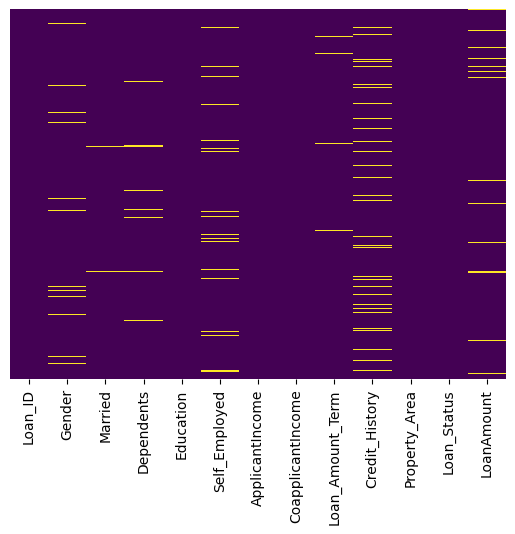

In [16]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [17]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
LoanAmount           203
dtype: int64

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0


In [19]:
df_transpose = df.describe().T
df_transpose[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
ApplicantIncome,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,0.0,0.0,1188.5,2297.25,41667.0
Loan_Amount_Term,12.0,360.0,360.0,360.00,480.0
Credit_History,0.0,1.0,1.0,1.00,1.0
LoanAmount,9.0,100.0,128.0,168.00,700.0


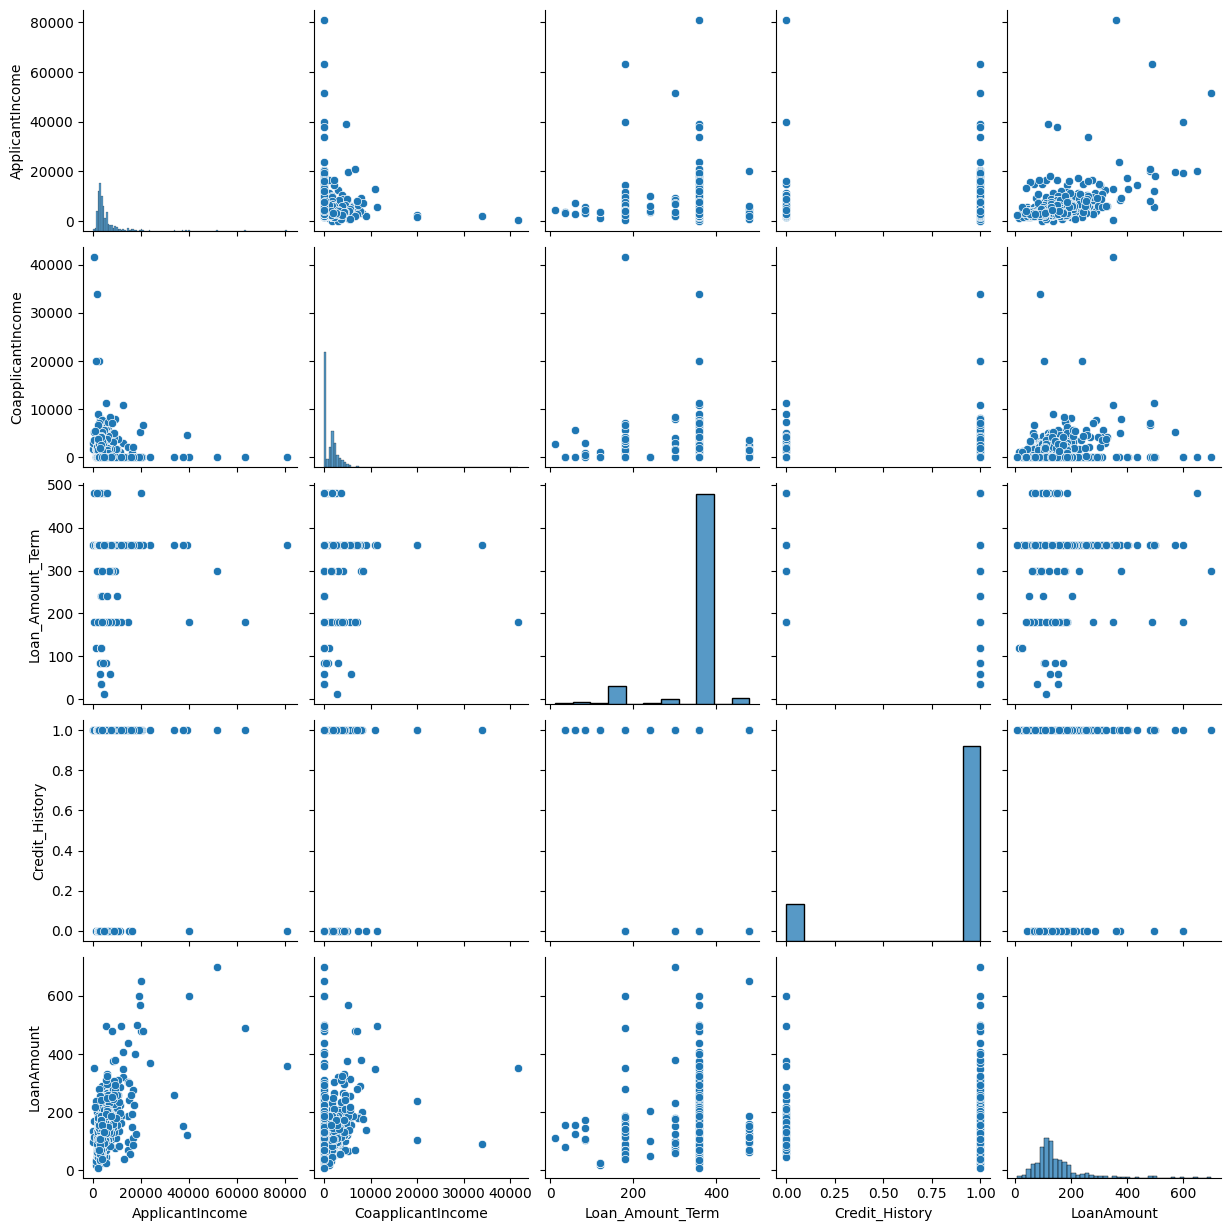

In [20]:
sns.pairplot(df.iloc[:,1:])

In [30]:
loan_counts = pd.DataFrame(df["LoanAmount"].value_counts()).reset_index()
loan_counts.columns =["Labels","LoanAmount"]
loan_counts

,Labels,LoanAmount
0,120.0,20
1,110.0,17
2,100.0,15
3,160.0,12
4,187.0,12
...,...,...
198,240.0,1
199,214.0,1
200,59.0,1
201,166.0,1


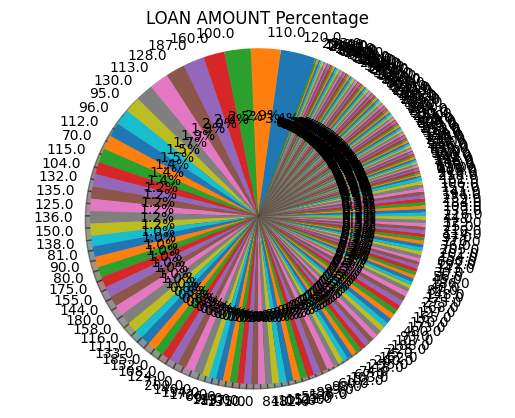

In [32]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(loan_counts["LoanAmount"], labels=loan_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title("LOAN AMOUNT Percentage")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 44.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 70.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 42.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 67.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 37.6% of the points cannot be plac

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 71.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


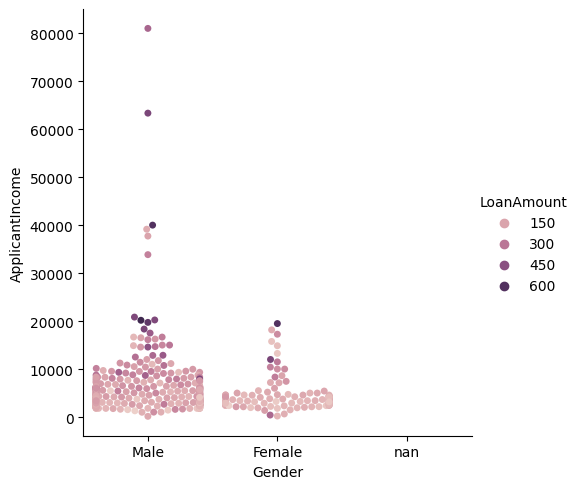

In [33]:
sns.catplot(x='Gender', y='ApplicantIncome', hue='LoanAmount', data = df, kind='swarm')


<Axes: xlabel='Education', ylabel='ApplicantIncome'>

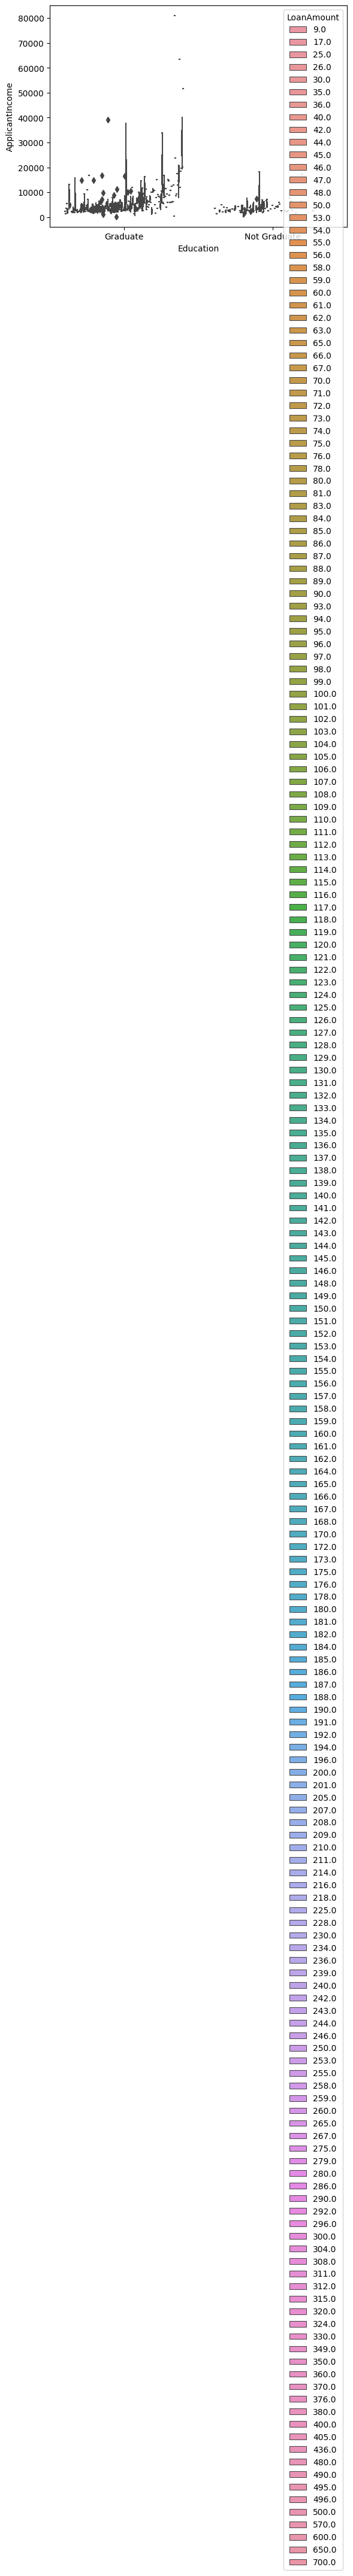

In [34]:
sns.boxplot(x='Education', y='ApplicantIncome', hue='LoanAmount', data = df)

<Axes: xlabel='ApplicantIncome', ylabel='Loan_Amount_Term'>

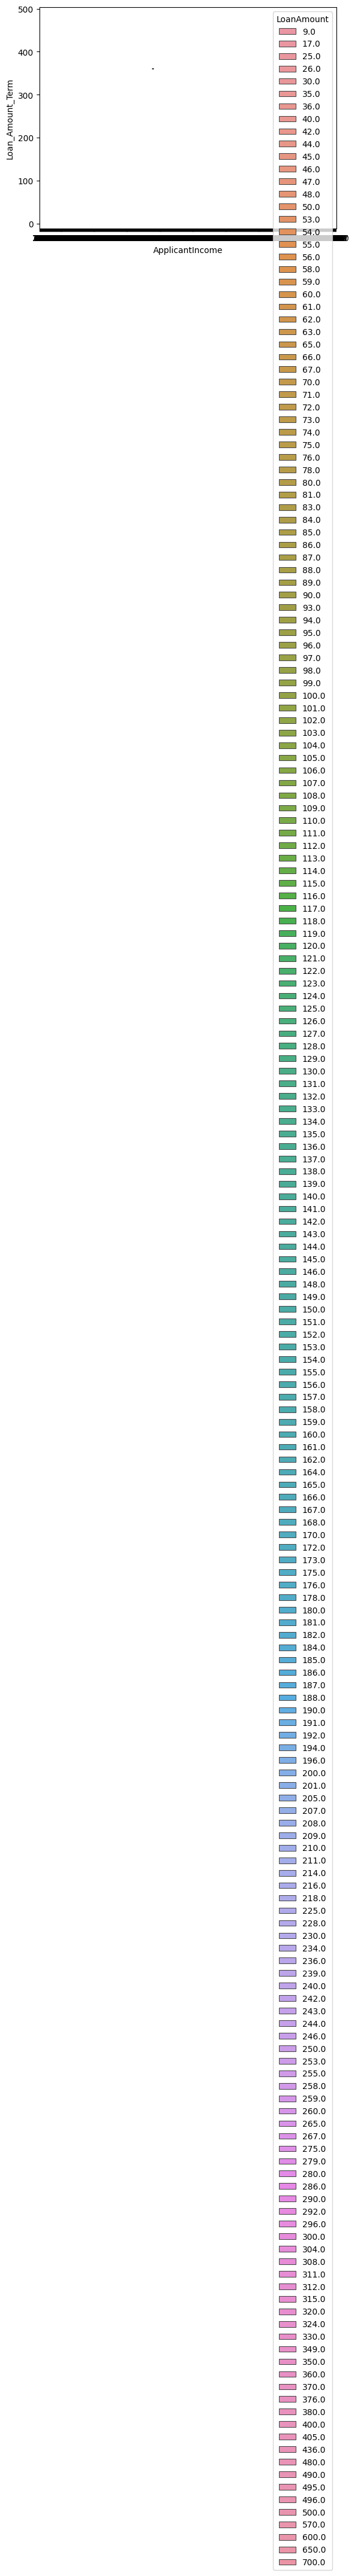

In [36]:
sns.boxplot(x="ApplicantIncome", y='Loan_Amount_Term', hue="LoanAmount", data=df)